# Python и красивые ножки - демонстрация тетрадок IPython и библиотек Python
#### Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий

Раньше мы уже <a href="https://habrahabr.ru/post/251225/">искали</a> необычные модели Playboy с помощью библиотеки Python Scikit-learn. 
Теперь мы продемонстрируем некоторые возможности библиотек SymPy, SciPy и Matplotlib на живом примере из разряда занимательных школьных задач по математике. 

<img src="img/woman.jpg">

## Задача 1

Стоит девушка с изящными, натренированными, а главное, оголенными ножками. Скучает. Перед тем как демонстрировать свой (n+1)-ый уровень владения техникой пикапа, хочется получше рассмотреть ножки девушки - а стоит ли овчинка выделки? Получше рассмотреть - это под наибольшим углом. Можно незаметно подходить к девушке (типа вдаль смотришь), но приседать нельзя - надо же как-то и приличия соблюдать. С какого расстояния ножки видны под наибольшим углом? Допустим, Ваш рост таков, что глаза находятся на высоте $m$ над поверхностью земли. Ноги девушки оголены до высоты $f$.

<img src='img/legs_scheme.jpg' width=50%>

Картинка и перефразированная задача из "Кристоф Дрессер: Обольстить математикой. Числовые игры на все случаи жизни. Бином. Лаборатория знаний, 2015"

## Решение

Поясним проблему. Издалека плохо рассматривать ноги - они видны под слишком малым углом. Но и если подойти слишком близко, ноги тоже будут видны под малым углом. Где-то должно быть оптимальное расстояние. 

Пусть $x$ - расстояние до девушки, $f$ - длина оголенной части ног девушки, $\alpha$ - угол, под которым ноги видны (надо максимизировать).

Угол $\alpha$ проще всего найти, вычитая из прямого угла углы $\beta$ и $\gamma$. Если школьная тригонометрия еще как-то жива в закоулках мозга, легко получим, что

<center> $\alpha$ = $\frac{\pi}{2} - arctg(\frac{x}{m}) - arctg(\frac{m-f}{x})$ </center> 

Задача сводится к максимизации $\alpha$ по переменной $x$.
Ну это тоже просто, скажем мы: зануляем производную - и вперед! 

Для начала построим график функции $\alpha(x)$. Для определенности возьмем значения переметров $m=1.7\ м$ и $f=0.7\ м$ (хотелось бы 1 м, но все же предполагается, что имеется некая юбка.)

In [1]:
# отключим лишние предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import numpy as np
from math import pi, atan

Populating the interactive namespace from numpy and matplotlib


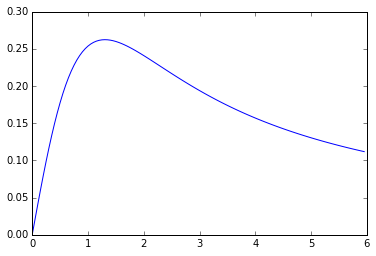

In [2]:
def alpha(x, m, f):
    return pi/2 - atan(x/m) - atan((m-f)/x)

x = np.arange(0,6,0.05)
plot(x, [alpha(i, 1.7, 0.7) for i in x])

Итак, действительно, где-то в 1-1.5 м от девушки ее ноги видны под наибольшим углом. Ну... это уже сложно без палева. Давайте теперь найдем точное значение оптимального расстояния до девушки.

## Аналитическое решение "от руки"

Решение достаточно простое, всего-то надо вспомнить, что производная арктангенса <center>$arctg'(x) = \frac{1}{1+x^2}$</center>

Зафиксируем $m=1.7\ м$ и $f=0.7\ м$. Тогда $\alpha$ = $\frac{\pi}{2} - arctg(\frac{x}{1.7}) - arctg(\frac{1}{x})$

<center>$\alpha'(x) = \frac{1}{x^2} \frac{1}{1 + \{\frac{1}{x}\}^2} - \frac{1}{1.7}\frac{1}{1+\{\frac{x}{1.7}\}^2}$</center>

После несложных преобразований получается $\alpha'(x) = \frac{(x^2 + 1.7^2) - 1.7(x^2+1)}{(x^2+1)(x^2 + 1.7^2)}$

И тогда максимум $\alpha(x)$ достигается, когда
<center>$(x^2 + 1.7^2) - 1.7(x^2+1) = 0$</center>
<center>$x^2(1-1.7) - 1.7(1-1.7) = 0$</center>
<center>$x^2=1.7, x = \sqrt{1.7} \approx 1.3\ (м) $</center>

## Аналитическое решение с SymPy

SymPy - это библиотека символьных вычислений на языке Python. Мы рассмотрим, как с ее помощью вычислять производные (метод diff) и находить корни уравнений.

In [3]:
import sympy as sym

Заведем символьную переменную $x$ и функцию $\alpha(x)$. Для этого $\pi$ и $arctg$ тоже надо взять из SymPy.

In [4]:
x = sym.Symbol('x')
alpha = sym.pi/2 - sym.atan(x/1.7) - sym.atan(1/x)

In [5]:
alpha

-atan(1/x) - atan(0.588235294117647*x) + pi/2

Посчитаем производную $\alpha'(x)$. Методу diff надо указать функцию, переменную, по которой происходит дифференцирование, и порядок производной, в данном случае 1.

In [6]:
alpha_deriv = sym.diff(alpha, x, 1)

In [7]:
alpha_deriv

-0.588235294117647/(0.346020761245675*x**2 + 1) + 1/(x**2*(1 + x**(-2)))

Как видно, к общему знаменателю SymPy просто так выражения не приводит. Для этого есть метод simplify.

In [8]:
sym.simplify(alpha_deriv)

(-0.242214532871972*x**2 + 0.411764705882353)/((0.346020761245675*x**2 + 1)*(x**2 + 1))

Теперь найдем нули производной с помощью метода solve.

In [9]:
sym.solve(alpha_deriv, x)

[-1.30384048104053, 1.30384048104053]

Опять получили ответ, что лучше всего рассматривать девушку $\approx$ с 1.3 м.

## Численное решение c SciPy

<img src="img/gradient_descent.png" width=50%>

#### В библиотеке SciPy помимо всего полезного реализованы разные методы численной оптимизации. Побробное описание многих методов минимизации одномерных и многомерных функций даны в [документации](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.minimize.html) метода scipy.optimize.minimize.

Метода maximize как такового нет, поэтому задача максимизации будет эмулироваться минимизацией функции, домноженной на (-1). Рассмотрим самый простой случай - минимация скалярной функции одной переменной. Реализованы методы оптимизации 'brent', 'bounded' и 'golden', но отличия почему-то толком [не документированы](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar).

In [10]:
from scipy.optimize import minimize_scalar

alpha = lambda x: -(pi/2 - atan(x/1.7) - atan(1/x))

result = minimize_scalar(alpha, bounds=[0., 100.], method = 'bounded')

In [11]:
result

     fun: -0.26225515887585626
 message: 'Solution found.'
    nfev: 18
  status: 0
 success: True
       x: 1.3038404104038319

Ответ прежний, как и ожидалось.

In [12]:
result.x

1.3038404104038319

Теперь выберем девушку, на чьи ноги будем любоваться. Вернемся к знакомому набору данных <a href="https://yadi.sk/d/FCGEKxaKeqDrS">girls.csv</a> по моделям месяца по Playboy. 

## Задача 2

Найти среди моделей Playboy девушку с самым высоким ростом при "нормальном" индексе массы тела - от 18 до 18.5.

## Решение

In [13]:
import pandas as pd

In [14]:
girls = pd.read_csv('data/girls.csv')

In [15]:
girls.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


Создадим новый признак BMI - индекс массы тела, равный весу, деленному на рост в метрах в квадрате

In [16]:
girls['BMI'] = 100 ** 2 * girls['Weight'] / (girls['Height'] ** 2)

In [17]:
girls['BMI'].head()

0    19.834711
1    19.132653
2    18.870663
3    18.870663
4    19.473407
Name: BMI, dtype: float64

Построим гистограмму распределения BMI

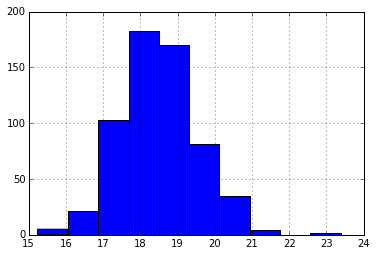

In [18]:
girls['BMI'].hist()

Википедия говорит, что нормальный индекс BMI - 18,5—24,99. Видим, что средний индекс у моделей Playboy примерно на нижней границе нормы. 
Отберем девушек с BMI от 18 до 18.5.

In [19]:
selected_girls = girls[(girls['BMI'] >= 18) & 
      (girls['BMI'] <= 18.5)]

In [20]:
selected_girls.sort(columns=['Height', 'Bust'], 
                    ascending=[False, False]).head(1)

,Month,Year,Bust,Waist,Hips,Height,Weight,BMI
430,July,1994,91,61,91,180,59,18.209877


Это Miss July 1994 Traci Adell. Дальше поисковик в помощь. Такой выбор вряд ли разочарует. Вот самое "приличное", что можно найти.

<img src="img/traci_adel.jpg" width=40%>

Мы посмотрели самые основы использования библиотек Python SymPy, SciPy и Pandas. Обилие примеров уже реального использования этих библиотек можно найти в репозиториях GitHub. Один из обзоров таких репозиториев <a href="https://habrahabr.ru/post/270449/">тут</a>. 

## Ссылки
- Материал этой тетрадки в [статье](https://habrahabr.ru/post/275963/) на Хабрахабре
- [Статья](https://habrahabr.ru/post/251225/) "Необычные модели Playboy, или про обнаружение выбросов в данных c помощью Scikit-learn" на Хабрахабре
- [Статья](https://habrahabr.ru/post/270449/) "Некоторые репозитории в помощь изучающим и преподающим Python и машинное обучение" на Хабрахабре
- [Курс](https://github.com/Yorko/python_intro) Python, основных алгоритмов и структур данных в виде тетрадок IPython
- [Статья](https://habrahabr.ru/company/mlclass/blog/252743/) "Ваш персональный курс по Big Data" на Хабрахабре